# Temat testów
### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od odpowiedzi na pytania dotyczące preferowanego typu grafiki i formy graficznej?

In [74]:
import pandas as pd

from functions.set_preparations import prepare_set_changes_questions, prepare_row, prepare_row_from_cols
from functions.tests.categorical_only import two_categorical_variable_test
from functions.plots import plot_heatmap

In [75]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr']
)

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
    usecols=['ID', 'Quest1_after', 'Quest2_after']
)

df_merge = df_answers.merge(df_quest, on='ID')
df_merge = df_merge[df_merge.ID != 6] 
df_merge.head()

,ID,Quest1_before,Quest2_before,1a_corr,1b_corr,2a_corr,2b_corr,3a_corr,3b_corr,Quest1_after,Quest2_after
0,1,B,wykres,1,1,0,0,1,1,B,wykres
1,2,B,wykres,1,1,1,1,0,1,B,wykres
2,3,B,mapa,1,1,1,1,0,0,B,mapa
3,4,B,mapa,1,1,1,1,1,0,B,wykres
4,5,B,tabela,1,1,1,1,1,1,B,tabela


In [76]:
# Utworzenie kolekcji:
# wszystkie grafiki
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(6)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(6)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(6)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(6)])
popr_row = prepare_row(df_answers.filter(regex='.*_corr$'))
df_collAll = pd.DataFrame({'correctness': popr_row, 'quest1_before': q1_b, 
                         'quest2_before': q2_b, 'quest1_after': q1_a,
                         'quest2_after': q2_a})

# grafiki A
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(3)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(3)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(3)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(3)])
popr_row = prepare_row(df_answers.filter(regex='.*a_corr$'))
df_collA = pd.DataFrame({'correctness': popr_row, 'quest1_before': q1_b, 
                         'quest2_before': q2_b, 'quest1_after': q1_a,
                         'quest2_after': q2_a})

# grafiki B
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(3)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(3)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(3)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(3)])
popr_row = prepare_row(df_answers.filter(regex='.*b_corr$'))
df_collB = pd.DataFrame({'correctness': popr_row, 'quest1_before': q1_b, 
                         'quest2_before': q2_b, 'quest1_after': q1_a,
                         'quest2_after': q2_a})

# grafiki 1
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
popr_row = prepare_row(df_answers.filter(regex='1.*_corr$'))
df_coll1 = pd.DataFrame({'correctness': popr_row, 'quest1_before': q1_b, 
                         'quest2_before': q2_b, 'quest1_after': q1_a,
                         'quest2_after': q2_a})

# grafiki 2
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
popr_row = prepare_row(df_answers.filter(regex='2.*_corr$'))
df_coll2 = pd.DataFrame({'correctness': popr_row, 'quest1_before': q1_b, 
                         'quest2_before': q2_b, 'quest1_after': q1_a,
                         'quest2_after': q2_a})

# grafiki 3
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
popr_row = prepare_row(df_answers.filter(regex='3.*_corr$'))
df_coll3 = pd.DataFrame({'correctness': popr_row, 'quest1_before': q1_b, 
                         'quest2_before': q2_b, 'quest1_after': q1_a,
                         'quest2_after': q2_a})

### TESTY

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**Poziom istotności:** $\alpha=0.05$

In [77]:
ALPHA = 0.05

#### Testy dla kolekcji

In [78]:
# wszystkie grafiki
two_categorical_variable_test(df_collAll, 'correctness', 'quest1_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collAll, 'correctness', 'quest1_after', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collAll, 'correctness', 'quest2_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collAll, 'correctness', 'quest2_after', ALPHA)

quest1_before   A    B
correctness           
0               6   62
1              18  154
Chi2 test conducted...
Chi-squared test statistic value: 0.020519835841313297
P-value: 0.8860947457453219
Brak podstaw do odrzucenia H0.
-----------------------------------
quest1_after   A    B
correctness          
0             27   41
1             39  133
Chi2 test conducted...
Chi-squared test statistic value: 6.261701881306578
P-value: 0.012337562787751074
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------------------
quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                39      10      3      16
1                87      32     15      38
Chi2 test conducted...
Chi-squared test statistic value: 2.100188912774411
P-value: 0.5518745459439827
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_after  mapa  tabela  tekst  wykres
correctness                              
0               36 

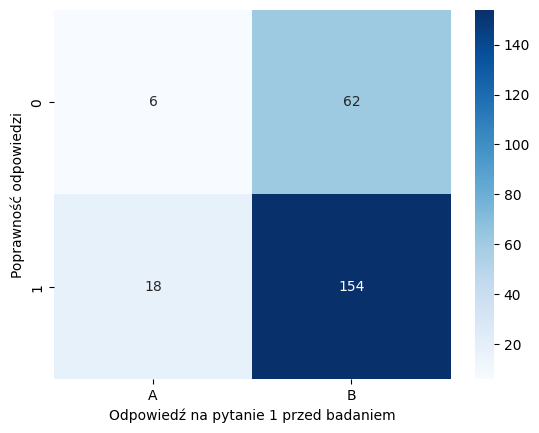

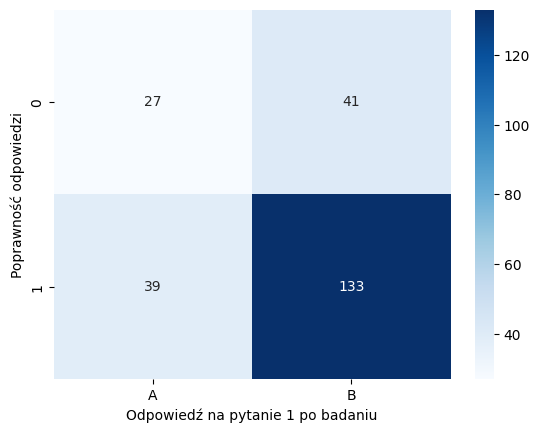

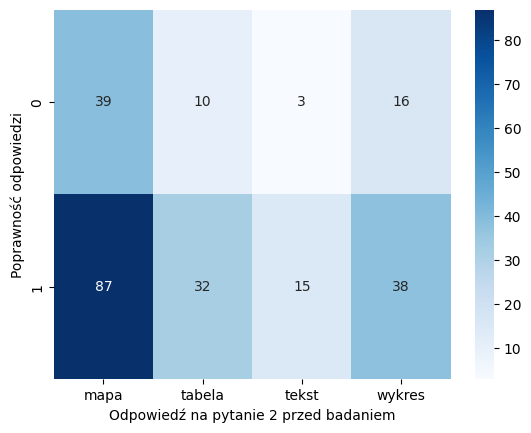

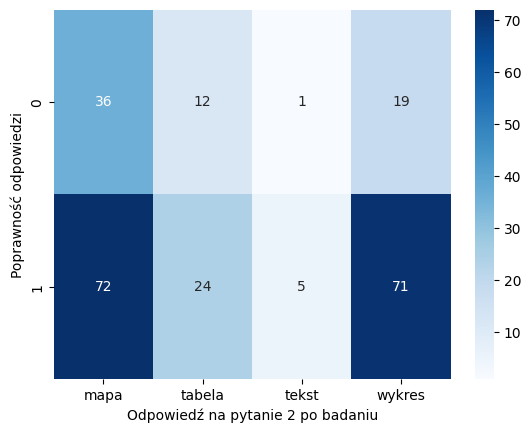

In [79]:
plot_heatmap(df_collAll, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_collAll, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
plot_heatmap(df_collAll, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_collAll, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

In [80]:
# grafiki A
two_categorical_variable_test(df_collA, 'correctness', 'quest1_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collA, 'correctness', 'quest1_after', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collA, 'correctness', 'quest2_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collA, 'correctness', 'quest2_after', ALPHA)

quest1_before  A   B
correctness         
0              3  32
1              9  76
Chi2 test conducted...
Chi-squared test statistic value: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
-----------------------------------
quest1_after   A   B
correctness         
0             12  23
1             21  64
Chi2 test conducted...
Chi-squared test statistic value: 0.7112562893495956
P-value: 0.3990270695124325
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                17       5      1      12
1                46      16      8      15
Chi2 test conducted...
Chi-squared test statistic value: 4.907563025210084
P-value: 0.17869232573596988
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_after  mapa  tabela  tekst  wykres
correctness                              
0               21       5      0       9
1               33      13      3      36
Chi2 test

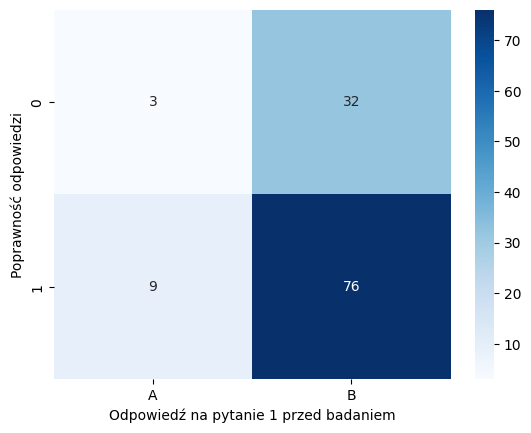

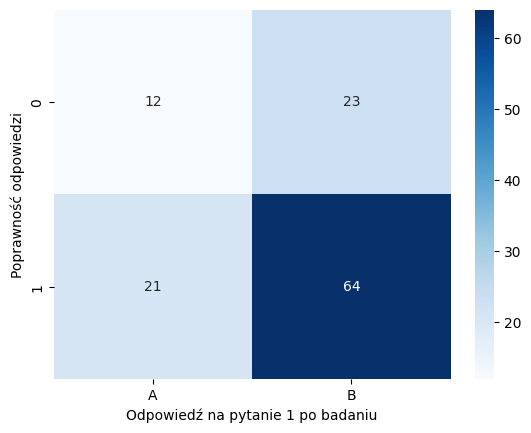

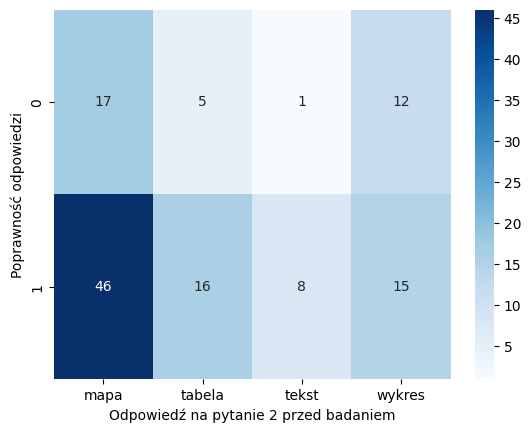

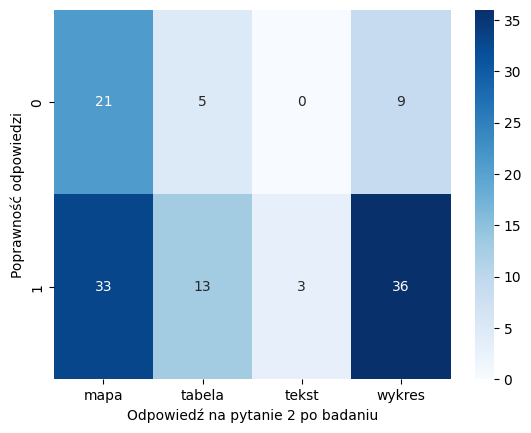

In [81]:
plot_heatmap(df_collA, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_collA, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
plot_heatmap(df_collA, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_collA, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

In [82]:
# grafiki B
two_categorical_variable_test(df_collB, 'correctness', 'quest1_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collB, 'correctness', 'quest1_after', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collB, 'correctness', 'quest2_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_collB, 'correctness', 'quest2_after', ALPHA)

quest1_before  A   B
correctness         
0              3  30
1              9  78
Chi2 test conducted...
Chi-squared test statistic value: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
-----------------------------------
quest1_after   A   B
correctness         
0             10  23
1             23  64
Chi2 test conducted...
Chi-squared test statistic value: 0.03786650419446882
P-value: 0.8457114456027384
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                14       7      3       9
1                49      14      6      18
Chi2 test conducted...
Chi-squared test statistic value: 1.8530128874956462
P-value: 0.6034672370275325
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_after  mapa  tabela  tekst  wykres
correctness                              
0               16       4      0      13
1               38      14      3      32
Chi2 tes

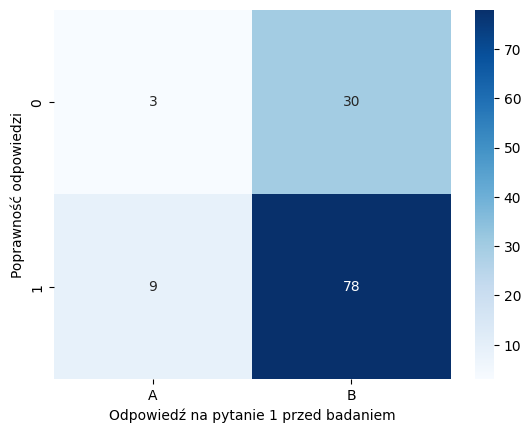

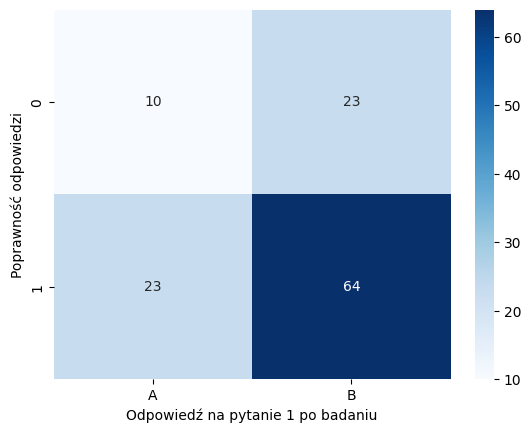

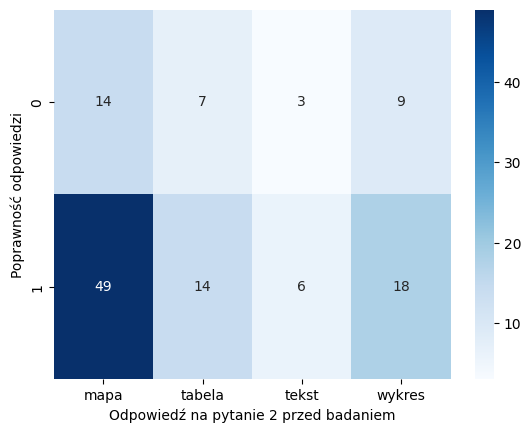

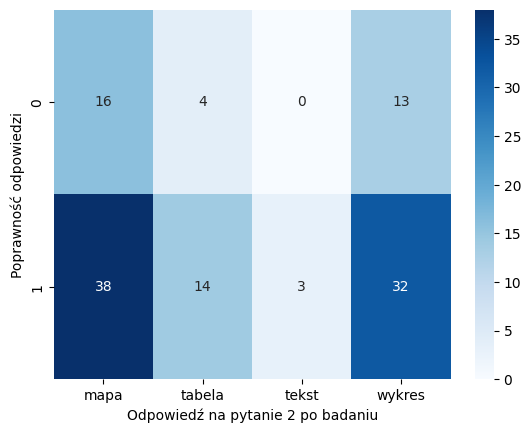

In [83]:
plot_heatmap(df_collB, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

In [84]:
# grafiki 1
two_categorical_variable_test(df_coll1, 'correctness', 'quest1_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll1, 'correctness', 'quest1_after', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll1, 'correctness', 'quest2_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll1, 'correctness', 'quest2_after', ALPHA)

quest1_before  A   B
correctness         
0              2   6
1              6  66
Chi2 test conducted...
Chi-squared test statistic value: 0.7561728395061729
P-value: 0.38452888286939724
Brak podstaw do odrzucenia H0.
-----------------------------------
quest1_after   A   B
correctness         
0              6   2
1             16  56
Chi2 test conducted...
Chi-squared test statistic value: 7.586206896551722
P-value: 0.005881657329733956
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------------------
quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                 5       0      0       3
1                37      14      6      15
Chi2 test conducted...
Chi-squared test statistic value: 3.28042328042328
P-value: 0.3503766669711941
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_after  mapa  tabela  tekst  wykres
correctness                              
0                7       0      0

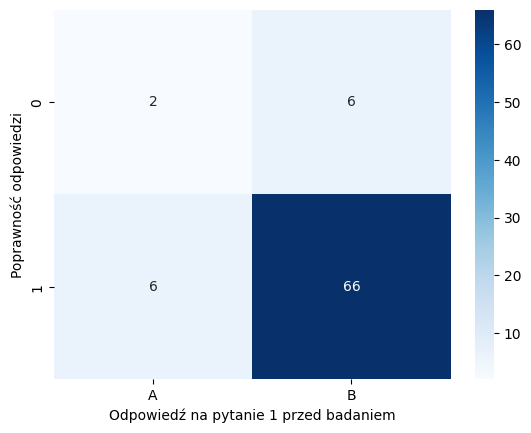

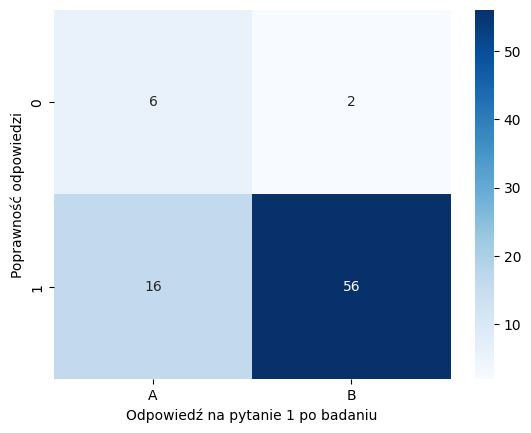

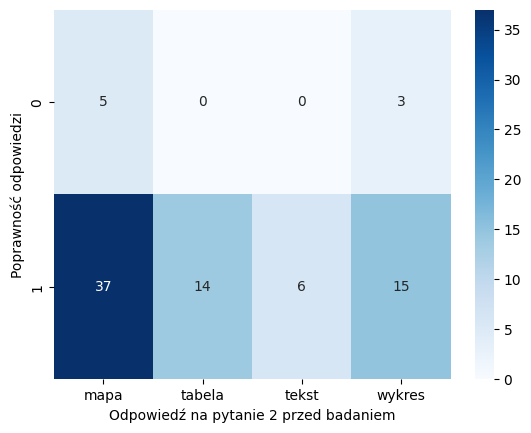

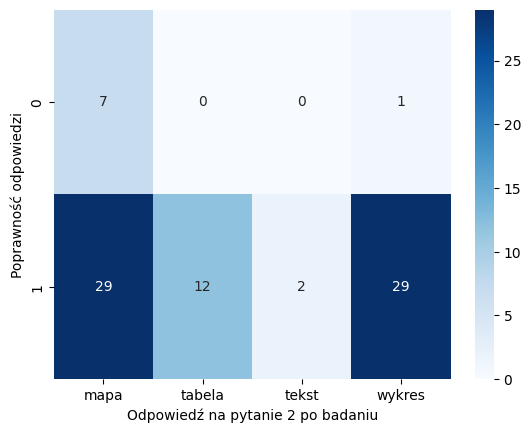

In [85]:
plot_heatmap(df_coll1, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_coll1, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
plot_heatmap(df_coll1, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_coll1, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

In [86]:
# grafiki 2
two_categorical_variable_test(df_coll2, 'correctness', 'quest1_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll2, 'correctness', 'quest1_after', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll2, 'correctness', 'quest2_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll2, 'correctness', 'quest2_after', ALPHA)

quest1_before  A   B
correctness         
0              3  19
1              5  53
Chi2 test conducted...
Chi-squared test statistic value: 0.0626959247648902
P-value: 0.8022845691354739
Brak podstaw do odrzucenia H0.
-----------------------------------
quest1_after   A   B
correctness         
0              8  14
1             14  44
Chi2 test conducted...
Chi-squared test statistic value: 0.6611570247933884
P-value: 0.4161517669863052
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                12       4      0       6
1                30      10      6      12
Chi2 test conducted...
Chi-squared test statistic value: 2.615315718763995
P-value: 0.4548108280215625
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_after  mapa  tabela  tekst  wykres
correctness                              
0               11       4      0       7
1               25    

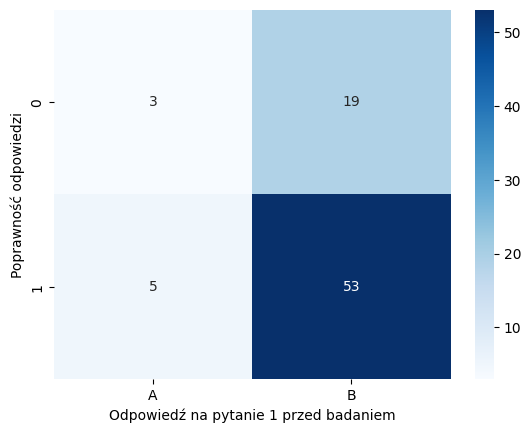

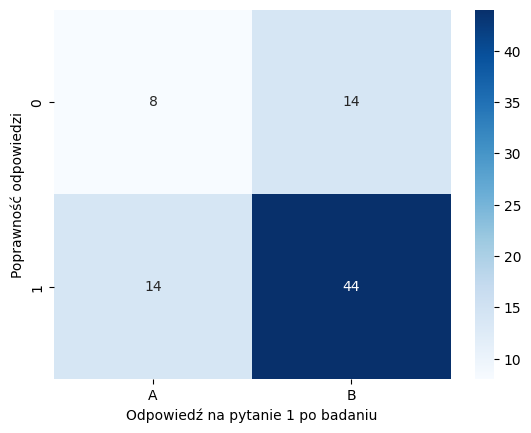

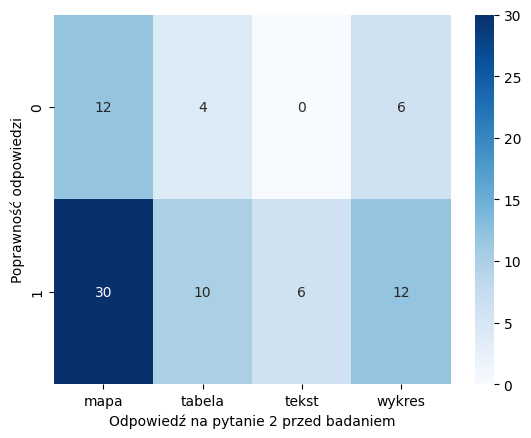

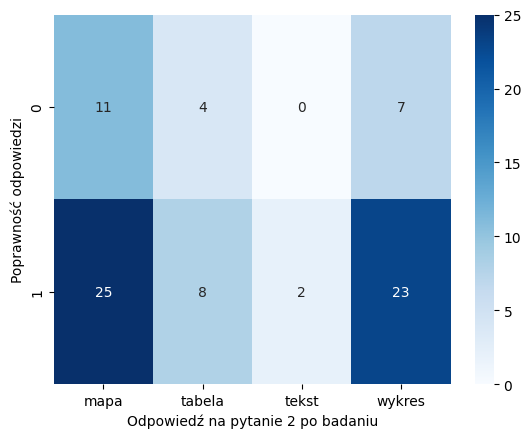

In [87]:
plot_heatmap(df_coll2, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

In [88]:
# grafiki 3
two_categorical_variable_test(df_coll3, 'correctness', 'quest1_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll3, 'correctness', 'quest1_after', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll3, 'correctness', 'quest2_before', ALPHA)
print('-----------------------------------')
two_categorical_variable_test(df_coll3, 'correctness', 'quest2_after', ALPHA)

quest1_before  A   B
correctness         
0              5  34
1              3  38
Chi2 test conducted...
Chi-squared test statistic value: 0.2001250781738587
P-value: 0.654619905463811
Brak podstaw do odrzucenia H0.
-----------------------------------
quest1_after   A   B
correctness         
0             12  27
1             10  31
Chi2 test conducted...
Chi-squared test statistic value: 0.15072115997263175
P-value: 0.6978471424952102
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                19      10      3       7
1                23       4      3      11
Chi2 test conducted...
Chi-squared test statistic value: 3.7936408668115993
P-value: 0.2846266715896343
Brak podstaw do odrzucenia H0.
-----------------------------------
quest2_after  mapa  tabela  tekst  wykres
correctness                              
0               18       8      0      13
1               18   

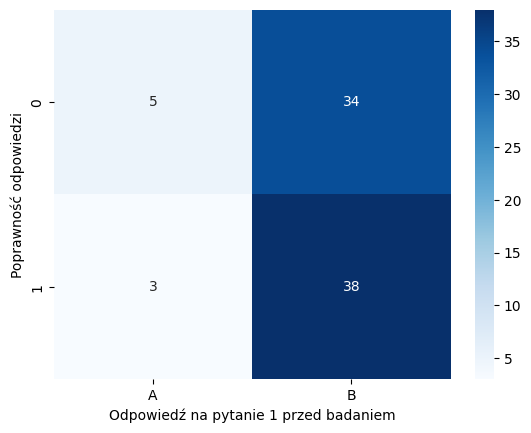

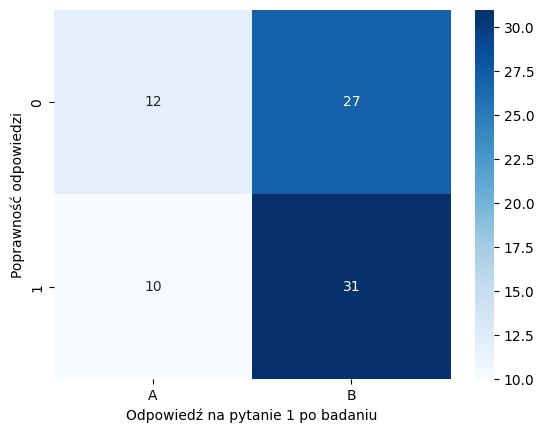

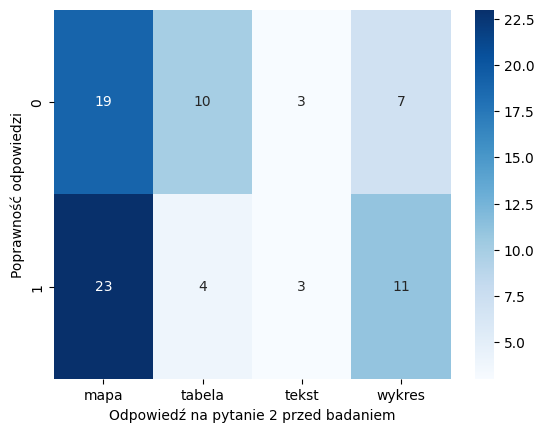

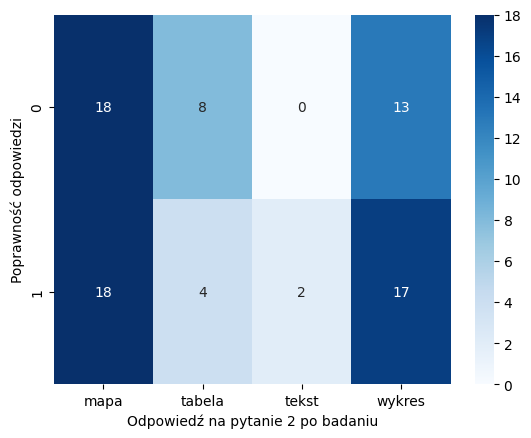

In [89]:
plot_heatmap(df_coll3, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

#### Testy oddzielnie dla każdej grafiki 1a, 1b, 2a, 2b, 3a, 3b

In [90]:
df1a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1a_corr']].rename(columns={'1a_corr':'correctness'})
df2a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2a_corr']].rename(columns={'2a_corr':'correctness'})
df3a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3a_corr']].rename(columns={'3a_corr':'correctness'})

df1b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1b_corr']].rename(columns={'1b_corr':'correctness'})
df2b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2b_corr']].rename(columns={'2b_corr':'correctness'})
df3b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3b_corr']].rename(columns={'3b_corr':'correctness'})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [91]:
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        two_categorical_variable_test(df, 'correctness', i, ALPHA)

---------------------------------------------
1a:
----------------
Quest1_before
Quest1_before  A   B
correctness         
0              1   4
1              3  32
Chi2 test conducted...
Chi-squared test statistic value: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Quest1_after  A   B
correctness        
0             4   1
1             7  28
Chi2 test conducted...
Chi-squared test statistic value: 5.176892073443798
P-value: 0.02288923071067978
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------------
Quest2_before
Quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                 3       1      0       1
1                18       6      3       8
Chi2 test conducted...
Chi-squared test statistic value: 0.526077097505669
P-value: 0.9131261529010268
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
Quest2_after  mapa  tabela  tekst  wykres
correctness                              
0   

-------------------------------------
1a:


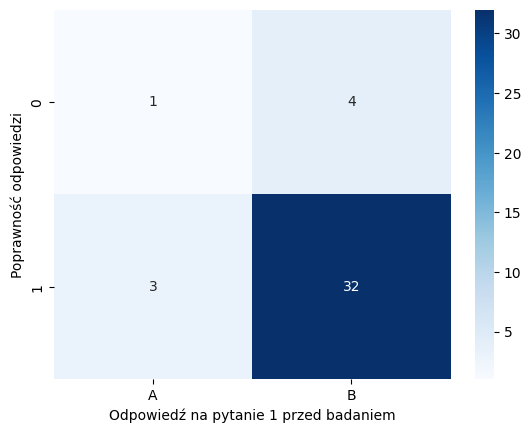

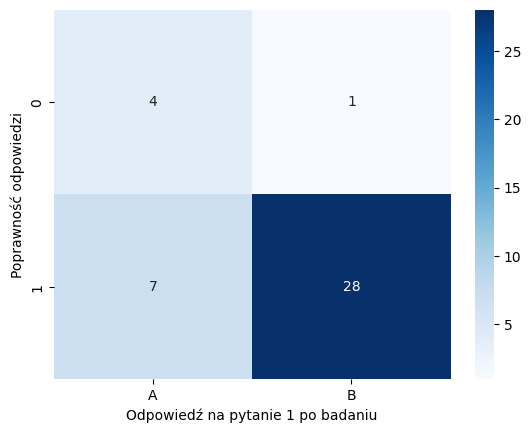

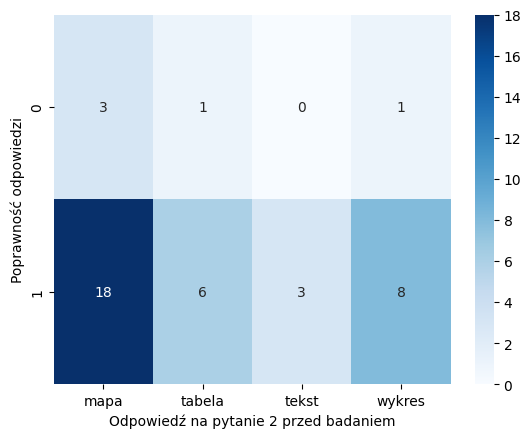

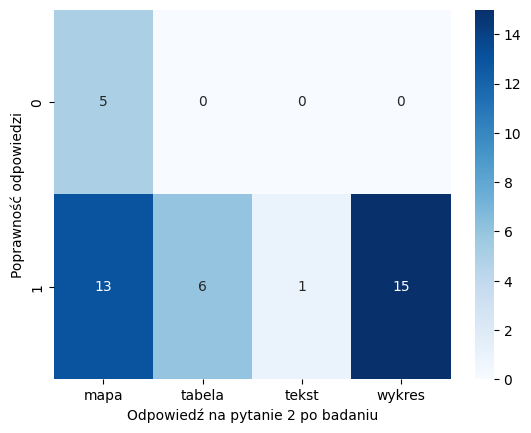

-------------------------------------
1b:


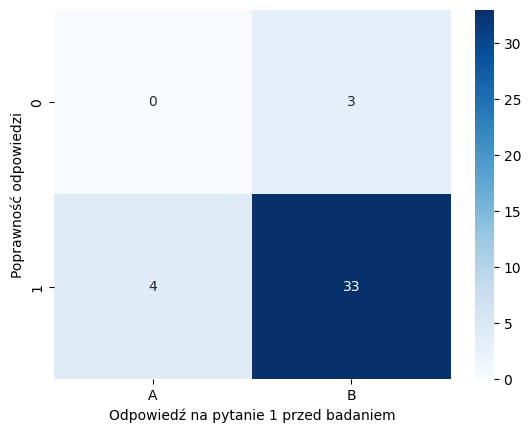

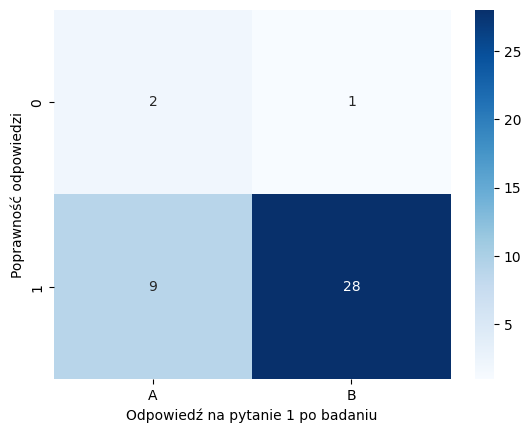

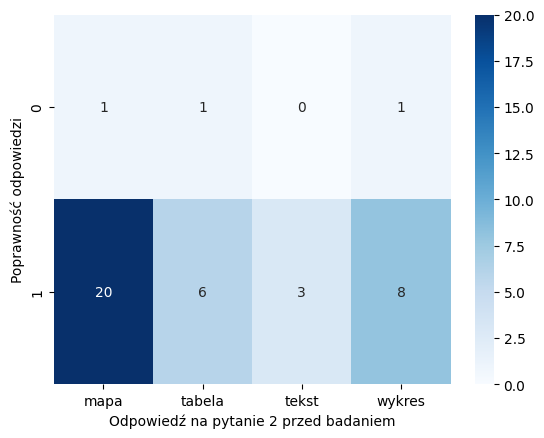

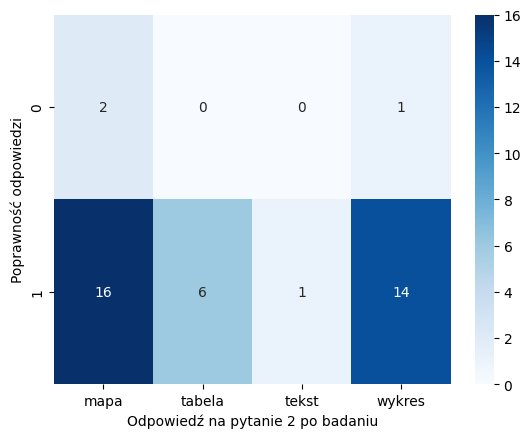

-------------------------------------
2a:


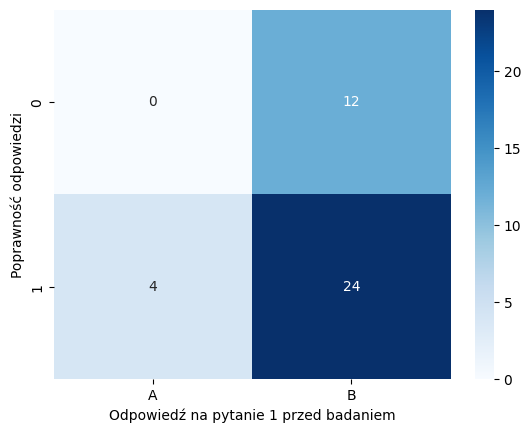

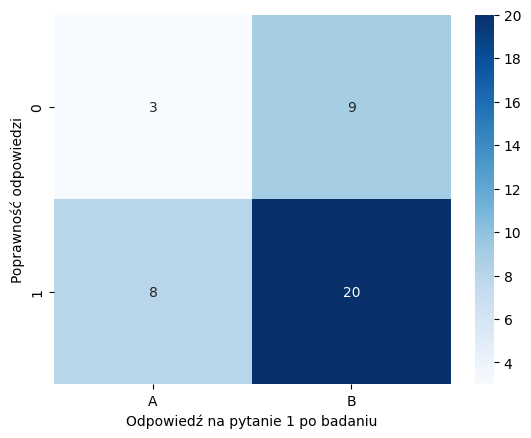

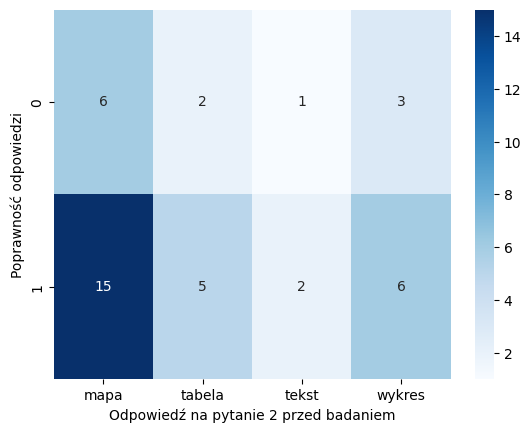

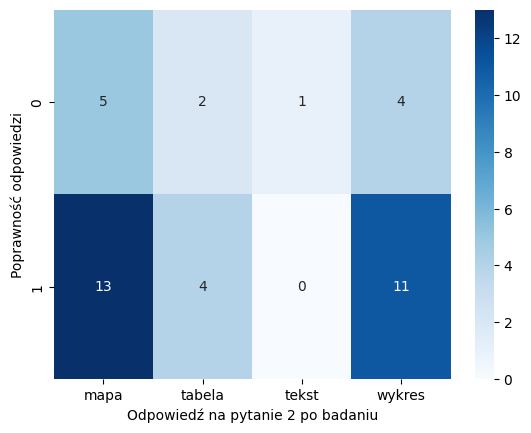

-------------------------------------
2b:


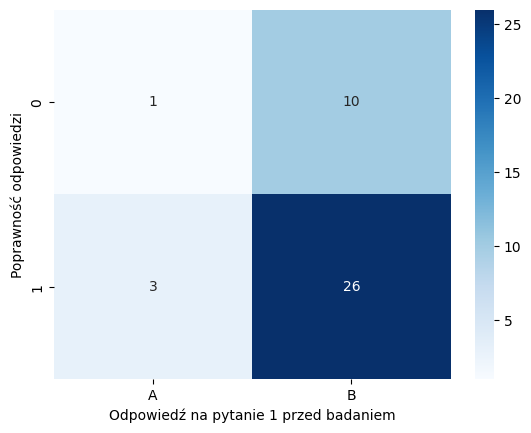

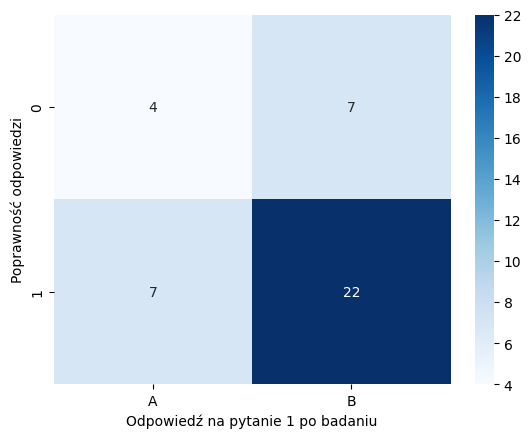

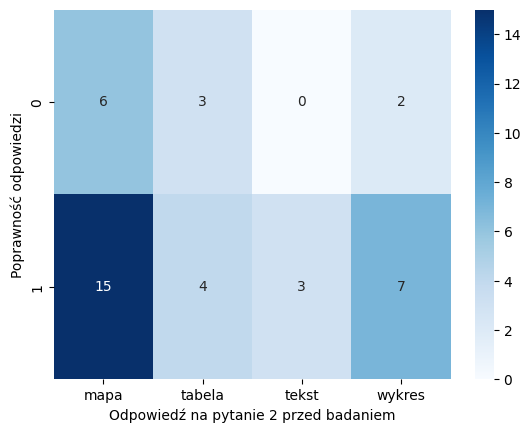

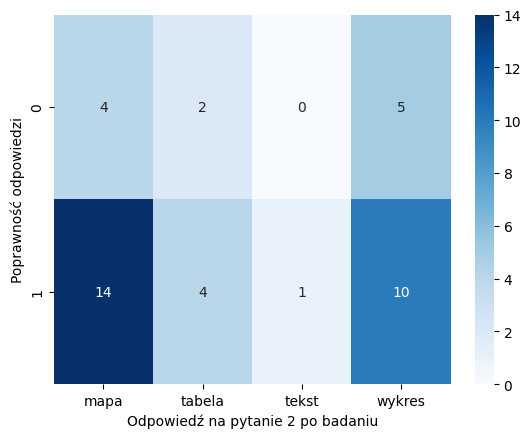

-------------------------------------
3a:


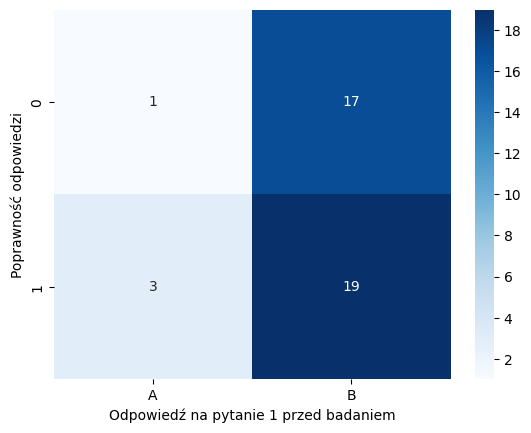

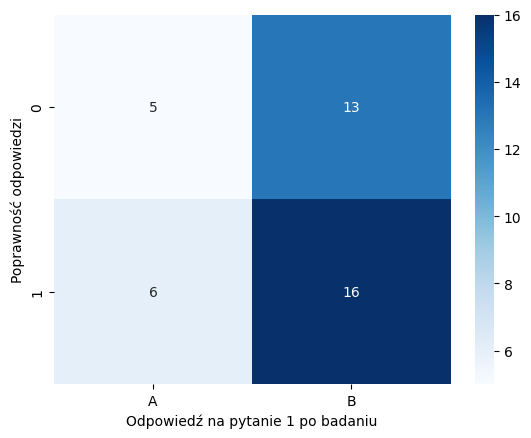

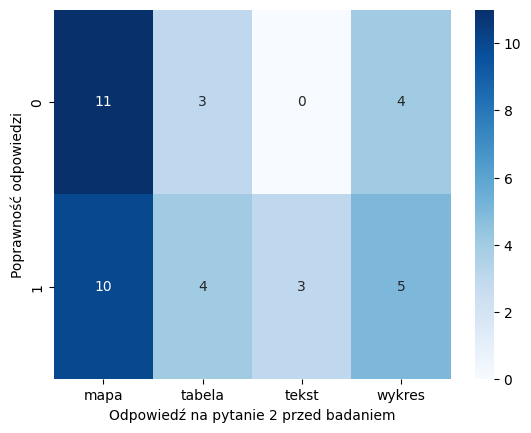

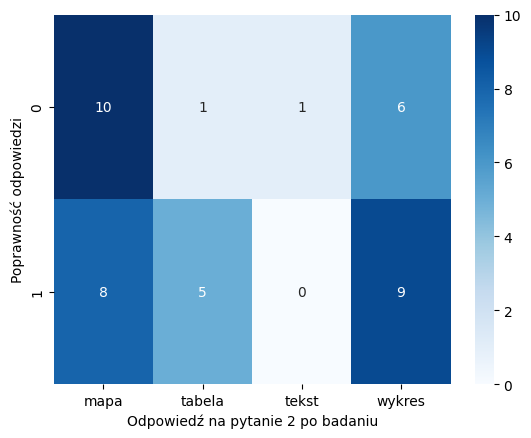

-------------------------------------
3b:


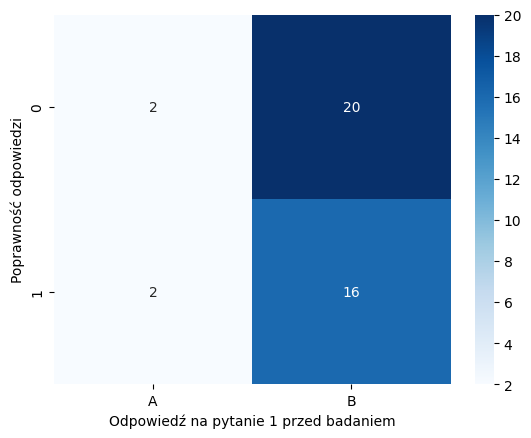

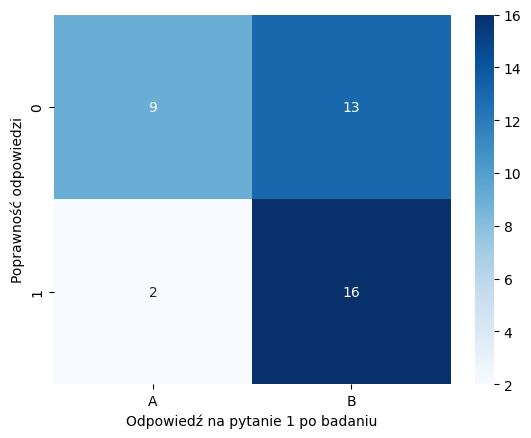

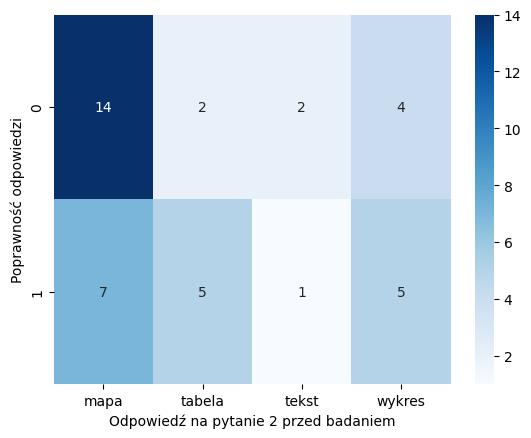

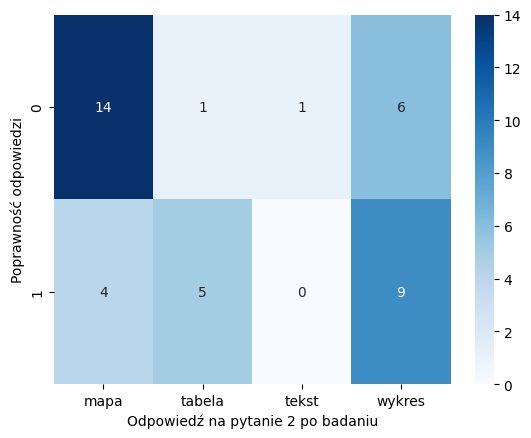

In [92]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])

    plot_heatmap(df, 'correctness', 'Quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a odpowiedzią na pytanie dotyczące preferowanej formy graficznej na poziomie istotności $\alpha=0.05$ dla:
- wszystkie grafiki, quest1_after
- grafiki 1, quest1_after
- grafika 1a, quest1_after
- grafika 3b, quest2_after



### Analiza - osoby które zmieniły zdanie vs osoby które pozostały przy swojej opinii

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a zmianą zdania w pytaniu 1/2.

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a zmianą zdania w pytaniu 1/2.

**Poziom istotności:** $\alpha=0.05$


In [93]:
df_merge['is_change_1'] = df_merge.apply(lambda row: row['Quest1_before'] != row['Quest1_after'], axis=1)
df_merge['is_change_2'] = df_merge.apply(lambda row: row['Quest2_before'] != row['Quest2_after'], axis=1)

df_merge

,ID,Quest1_before,Quest2_before,1a_corr,1b_corr,2a_corr,2b_corr,3a_corr,3b_corr,Quest1_after,Quest2_after,is_change_1,is_change_2
0,1,B,wykres,1,1,0,0,1,1,B,wykres,False,False
1,2,B,wykres,1,1,1,1,0,1,B,wykres,False,False
2,3,B,mapa,1,1,1,1,0,0,B,mapa,False,False
3,4,B,mapa,1,1,1,1,1,0,B,wykres,False,True
4,5,B,tabela,1,1,1,1,1,1,B,tabela,False,False
6,7,B,tekst,1,1,1,1,1,1,B,wykres,False,True
7,11,B,mapa,1,0,0,0,0,1,B,wykres,False,True
8,12,B,mapa,1,1,0,0,0,0,B,mapa,False,False
9,13,A,mapa,1,1,1,1,1,0,A,mapa,False,False
10,14,B,mapa,1,1,1,0,1,1,B,tabela,False,True


#### Grafiki:

In [94]:
# wszystkie
corr = [df_answers[col] for col in df_answers.columns.tolist() if col.endswith('corr')]        
changes1 = [df_merge['is_change_1'] for i in range(6)]
changes2 = [df_merge['is_change_2'] for i in range(6)]
df = prepare_set_changes_questions(corr, changes1, changes2, 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)

----------------
quest1
quest1       False  True
correctness             
0               47    21
1              139    33
Chi2 test conducted...
Chi-squared test statistic value: 3.18197196357913
P-value: 0.07445482441554811
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0               33    35
1               63   109
Chi2 test conducted...
Chi-squared test statistic value: 2.401675786593706
P-value: 0.12120534948708232
Brak podstaw do odrzucenia H0.


In [95]:
# grafiki A
corr = [df_answers[col] for col in df_answers.columns.tolist() if col.endswith('a_corr')]        
changes1 = [df_merge['is_change_1'] for i in range(3)]
changes2 = [df_merge['is_change_2'] for i in range(3)]
df = prepare_set_changes_questions(corr, changes1, changes2, 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)

----------------
quest1
quest1       False  True
correctness             
0               26     9
1               67    18
Chi2 test conducted...
Chi-squared test statistic value: 0.09035872413481522
P-value: 0.7637216066071921
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0               16    19
1               32    53
Chi2 test conducted...
Chi-squared test statistic value: 0.37815126050420167
P-value: 0.538594314826435
Brak podstaw do odrzucenia H0.


In [96]:
# grafiki B
corr = [df_answers[col] for col in df_answers.columns.tolist() if col.endswith('b_corr')]        
changes1 = [df_merge['is_change_1'] for i in range(3)]
changes2 = [df_merge['is_change_2'] for i in range(3)]
df = prepare_set_changes_questions(corr, changes1, changes2, 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)

----------------
quest1
quest1       False  True
correctness             
0               26     7
1               67    20
Chi2 test conducted...
Chi-squared test statistic value: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0               13    20
1               35    52
Chi2 test conducted...
Chi-squared test statistic value: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.


In [97]:
# grafiki 1,2,3
print('1:')
corr = [df_answers[col] for col in df_answers.columns.tolist() if col.startswith('1') and col.endswith('_corr')]        
changes1 = [df_merge['is_change_1'] for i in range(2)]
changes2 = [df_merge['is_change_2'] for i in range(2)]
df = prepare_set_changes_questions(corr, changes1, changes2, 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    

print('--------------------------------------------')
print('2:')
corr = [df_answers[col] for col in df_answers.columns.tolist() if col.startswith('2') and col.endswith('_corr')]        
changes1 = [df_merge['is_change_1'] for i in range(2)]
changes2 = [df_merge['is_change_2'] for i in range(2)]
df = prepare_set_changes_questions(corr, changes1, changes2, 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    
print('--------------------------------------------')
print('3:')
corr = [df_answers[col] for col in df_answers.columns.tolist() if col.startswith('3') and col.endswith('_corr')]        
changes1 = [df_merge['is_change_1'] for i in range(2)]
changes2 = [df_merge['is_change_2'] for i in range(2)]
df = prepare_set_changes_questions(corr, changes1, changes2, 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)

1:
----------------
quest1
quest1       False  True
correctness             
0                4     4
1               58    14
Chi2 test conducted...
Chi-squared test statistic value: 2.3018717642373554
P-value: 0.1292181989584457
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0                6     2
1               26    46
Chi2 test conducted...
Chi-squared test statistic value: 3.061342592592592
P-value: 0.08017539735495302
Brak podstaw do odrzucenia H0.
--------------------------------------------
2:
----------------
quest1
quest1       False  True
correctness             
0               15     7
1               47    11
Chi2 test conducted...
Chi-squared test statistic value: 0.8638105189829327
P-value: 0.35267453737738796
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0                8    14
1               24    34
Chi2 test conducted...
Chi-squared test statist

In [98]:
# dla każdej grafiki oddzielnie
print('1a:')
df = prepare_set_changes_questions([df_answers['1a_corr']], [df_merge['is_change_1']], [df_merge['is_change_2']], 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    
print('--------------------------------------------')
print('1b:')
df = prepare_set_changes_questions([df_answers['1b_corr']], [df_merge['is_change_1']], [df_merge['is_change_2']], 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    
print('--------------------------------------------')
print('2a:')
df = prepare_set_changes_questions([df_answers['2a_corr']], [df_merge['is_change_1']], [df_merge['is_change_2']], 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    
print('--------------------------------------------')
print('2b:')
df = prepare_set_changes_questions([df_answers['2b_corr']], [df_merge['is_change_1']], [df_merge['is_change_2']], 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    
print('--------------------------------------------')
print('3a:')
df = prepare_set_changes_questions([df_answers['3a_corr']], [df_merge['is_change_1']], [df_merge['is_change_2']], 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)
    
print('--------------------------------------------')
print('3b:')
df = prepare_set_changes_questions([df_answers['3b_corr']], [df_merge['is_change_1']], [df_merge['is_change_2']], 'correctness')

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    two_categorical_variable_test(df, 'correctness', i, ALPHA)

1a:
----------------
quest1
quest1       False  True
correctness             
0                2     3
1               29     6
Chi2 test conducted...
Chi-squared test statistic value: 2.4782386072708653
P-value: 0.11543145911332102
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0                3     2
1               13    22
Chi2 test conducted...
Chi-squared test statistic value: 0.23809523809523808
P-value: 0.6255852315243251
Brak podstaw do odrzucenia H0.
--------------------------------------------
1b:
----------------
quest1
quest1       False  True
correctness             
0                1     2
1               30     7
Chi2 test conducted...
Chi-squared test statistic value: 1.4065678581807608
P-value: 0.23562698489872286
Brak podstaw do odrzucenia H0.
----------------
quest2
quest2       False  True
correctness             
0                0     3
1               16    21
Chi2 test conducted...
Chi-squared test sta

Podsumowanie:
Zmiana zdania nie wpłynęła na poprawność odpowiedzi w sposób istotny statystycznie.